<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


In [2]:
data = {
    'Weather' : ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy' : [0, 1, 0, 1, 0, 1, 0, 1],
    'Play' : [1, 0, 1, 1, 0, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


In [4]:
df['Weather_num'] = df['Weather'].map({'Sunny': 1, 'Rainy': 0})

X_train = df[['Weather_num', 'Windy']]
y_train = df['Play']


In [5]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
tree

DecisionTreeClassifier(max_depth=3, random_state=42)

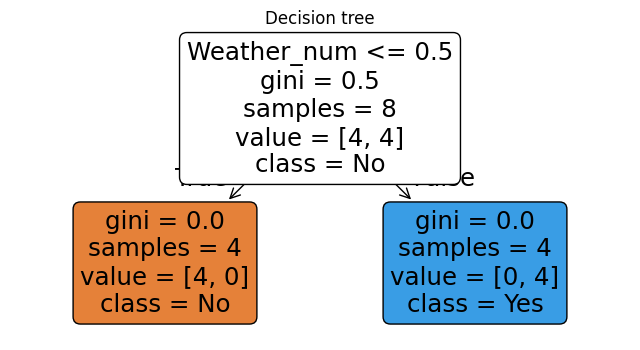

In [7]:
plt.figure(figsize=(8, 4))
plot_tree(
    tree,
    feature_names=['Weather_num', 'Windy'],
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.title("Decision tree")
plt.show()

In [10]:
one = pd.DataFrame([[1,0]], columns =['Weather_num', 'Windy'])
pred1 = tree.predict(one)[0]
print('Sunny, not Windy -> Play prediction: ', pred1)

two = pd.DataFrame([[0,1]], columns =['Weather_num', 'Windy'])
pred2 = tree.predict(two)[0]
print('Not Sunny, Windy -> Play prediction: ', pred2)

Sunny, not Windy -> Play prediction:  1
Not Sunny, Windy -> Play prediction:  0


In [12]:
from sklearn.datasets import make_classification

X_big, y_big = make_classification(
    n_samples=400,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(
    X_big, y_big, test_size=0.3, random_state=42
)

X_train_big.shape, X_test_big.shape

((280, 5), (120, 5))

In [23]:
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big, y_train_big)

pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=4)
pruned_tree.fit(X_train_big, y_train_big)

y_train_pred_deep = deep_tree.predict(X_train_big)
y_test_pred_deep = deep_tree.predict(X_test_big)

y_train_pred_pruned = pruned_tree.predict(X_train_big)
y_test_pred_pruned = pruned_tree.predict(X_test_big)

print('Deep tree - train accuracy: ', round(accuracy_score(y_train_big, y_train_pred_deep), 3))
print('Deep tree - test accuracy: ', round(accuracy_score(y_test_big, y_test_pred_deep), 3))

print('Pruned tree - train accuracy: ', round(accuracy_score(y_train_big, y_train_pred_pruned), 3))
print('Pruned tree - test accuracy: ', round(accuracy_score(y_test_big, y_test_pred_pruned), 3))

Deep tree - train accuracy:  1.0
Deep tree - test accuracy:  0.883
Pruned tree - train accuracy:  0.904
Pruned tree - test accuracy:  0.892


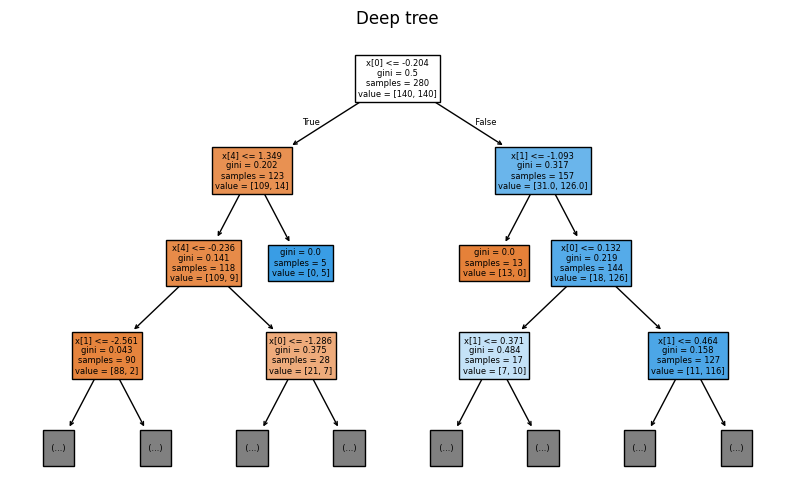

In [22]:
plt.figure(figsize=(10, 6))
plot_tree(deep_tree, filled=True, max_depth=3)
plt.title("Deep tree")
plt.show()

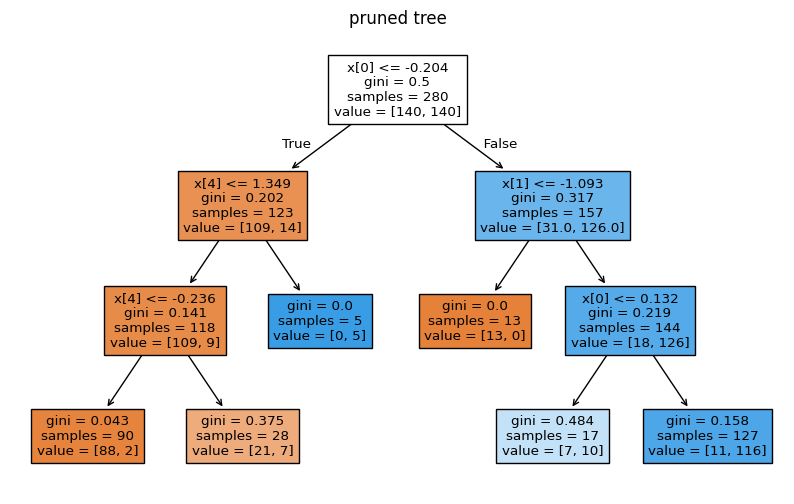

In [24]:
plt.figure(figsize=(10, 6))
plot_tree(pruned_tree, filled=True, max_depth=3)
plt.title("pruned tree")
plt.show()

In [25]:
np.random.seed(42)
n_samples = 300
age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 120)
prob = 1/(1+np.exp(-0.05*risk_score))

target = (prob > np.median(prob)).astype(int)

df = pd.DataFrame({'age': age, 'chol': chol, 'thalach': thalach, 'target': target})
df.head()

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0


In [26]:
X_heart = df[['age', 'chol', 'thalach']]
y_heart = df['target']

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.3, random_state=42
)

tree_heart = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_heart.fit(X_train_heart, y_train_heart)
tree_heart

DecisionTreeClassifier(max_depth=4, random_state=42)

In [28]:
from sklearn.metrics import confusion_matrix

y_pred_h = tree_heart.predict(X_test_heart)

cm = confusion_matrix(y_test_heart, y_pred_h)
print(cm)

[[40  1]
 [ 7 42]]


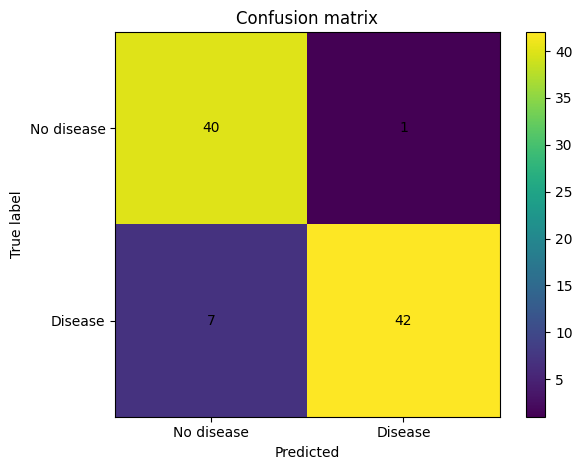

In [31]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation = 'nearest')
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('True label')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No disease', 'Disease'])
ax.set_yticklabels(['No disease', 'Disease'])

for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j,i,cm[i,j], ha='center', va='center')

plt.colorbar(im)
fig.tight_layout()
plt.show()

In [34]:
acc = accuracy_score(y_test_heart, y_pred_h)
prec = precision_score(y_test_heart, y_pred_h)
rec = recall_score(y_test_heart, y_pred_h)
f1 = f1_score(y_test_heart, y_pred_h)

print('Accuracy: ', round(acc, 3))
print('Precision: ', round(prec, 3))
print('Recall: ', round(rec, 3))
print('F1: ', round(f1, 3))

Accuracy:  0.911
Precision:  0.977
Recall:  0.857
F1:  0.913


In [35]:
y_prob_h = tree_heart.predict_proba(X_test_heart)[:, 1]
y_prob_h[:10]

array([1.        , 0.        , 0.05263158, 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.36363636])

In [37]:
fpr, tpr, thresholds = roc_curve(y_test_heart, y_prob_h)
roc_auc = auc(fpr, tpr)
print('AUC: ', round(roc_auc,3))

AUC:  0.952


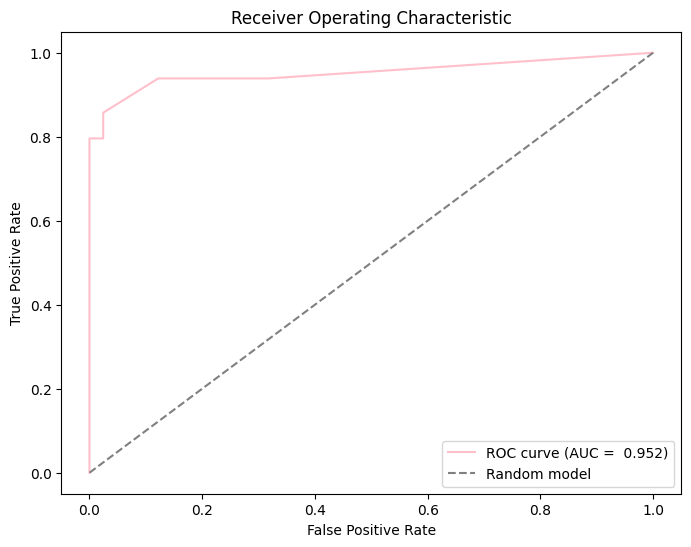

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()